In [12]:
import pandas as pd
import PyPDF2
import numpy as np
import math
from extractors.abstract_extractor import AbstractExractor
from utils.data.visualisation import visualiseIndividualfromDF, visualiseIndividualinMPL
from utils.misc.datastructure import perform_shape_switch
from tools.extraction_tools import extract_PDF_raw, extract_leads_numeric, move_trace_to_origin, scale_values_using_cal_mark, \
    create_measurement_points
import logging
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

<font color='green'>**Import leads from PDF EKG as numeric values**</font>


In [ ]:
# reference value for the calibration jag
cal_ref = 1000

# extracted height for the calibration jag in PDF (extract pixel height from PDF)
#orginal provided measurement from codebase 28.34800000000001 (height that is read in via pdf reader)
#extracted by measuring pixel height in Illustrator (28.35)
cal_height = 1000 #height that is read in with pdf reader with our EKG pdfs


# factor for scaling (effectively gamma = 1 based on read in structure from GE EKGs)
gamma = cal_ref / cal_height

# name of the leads
lead_names_short = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
lead_names_long = ['V1','II',"V5"]

#source data
path_source = os.getcwd()
data_source = 'data_test\\EKG_131515-20_0.pdf'
#data_source = 'data_test\\EKG_131515-33_0.pdf'
filename = os.path.join(path_source, data_source)

#Extract raw PDF data from source file
pdf_object = extract_PDF_raw(filename)


#define dict with index ranges for graphics object corresponding to leads/cal marker
range_list = {
    #range of lead extraction (short leads)
    'start_idx': 412,
    'end_idx'  : 423,
    #range of lead extraction (long leads)
    'start_idx_long': 427,
    'end_idx_long': 429,
    #calibration marker index
    'cal_idx' : 424
}

#Extract numeric x,y points for each lead 
lead_numeric = extract_leads_numeric(range_list,pdf_object)

#Shift traces to common origin
shift_leads = list(map(move_trace_to_origin, lead_numeric))

#Scale leads by gamma factor (gamma = 1 for current EKG PDFs)
scale_shift_leads = [scale_values_using_cal_mark(l, gamma) for l in shift_leads]

#convert traces to by linear interpolation to timepoints along sampling frequency (500 Hz)
#for 2.5s strips (500Hz acquisition freq for 2.5s)
sample_points = 1250
leads_upsampled = [create_measurement_points(l, sample_points) for l in scale_shift_leads[0:12]]

#for 10s strips (500Hz acquisition frq for 10s)
sample_points = 5000
leads_upsampled.extend([create_measurement_points(l, sample_points) for l in scale_shift_leads[13:16]])


<font color='green'>**Plot traces for each lead**</font>

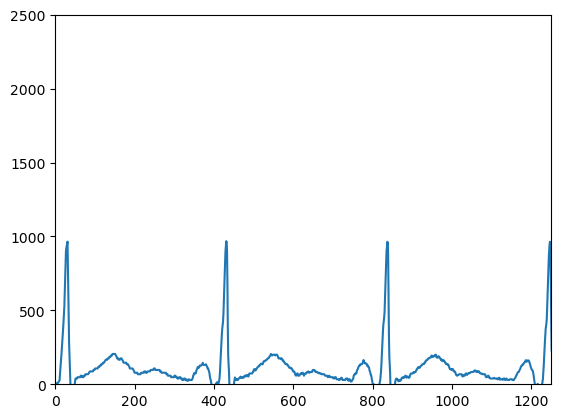

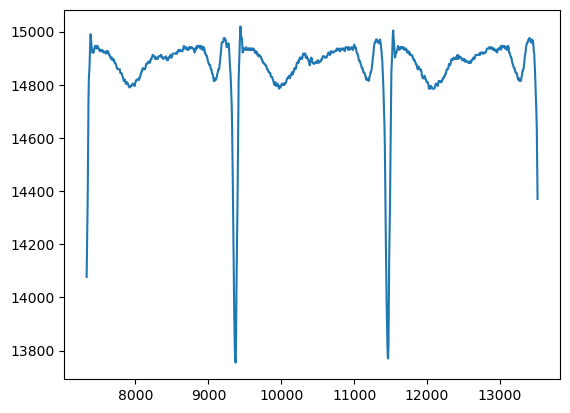

In [4]:
#Plot origin shifted traces
fig, ax = plt.subplots()

new_lead_list = np.array(measurement_points)
ax.plot(new_lead_list, markeredgewidth=2)
ax.set(xlim=(0,1250))
ax.set(ylim=(0,2500))
plt.show()


#Plot x,y traces of each lead in discovery run
fig, ax = plt.subplots()

lead_idx = 3
ax.plot(lead_numeric[lead_idx][:,0], lead_numeric[lead_idx][:,1], markeredgewidth=2)

plt.show()

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))